##Logistic Regression
#It is a statistical model, that in its basic form, uses a logistic function to model a binary dependent variable


other names for logReg:
logit regression, log linear classifyer, max entropy classification,
Target variable is binary
models the probablility based on the values 1 or more predictors
π(x) is the response of certain values of
𝑥
1
x
1
​
  to predictors and parameter estimators
𝑏
1
b
1
​
  all the way to
𝑏
𝑝
b
p
​
 . Regression estimates parameters that maximize the likelihood of obtaining the observed 0 and 1 values.

##Pima Indians Diabetes Database


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
#import data with
diabetes = pd.read_csv(rf'diabetes.csv', sep=',')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
#Creting logistic model that will help to plot regression plot

#train and split dataset
train, test = train_test_split(diabetes, test_size= 0.25, random_state= 0)

#construct logistic model using the training set
lm= smf.logit(formula= 'Outcome ~ BMI + Glucose', data= train).fit()
lm.params

Optimization terminated successfully.
         Current function value: 0.508985
         Iterations 6


Intercept   -7.489309
BMI          0.080115
Glucose      0.034147
dtype: float64

BMI and glucose are predictors

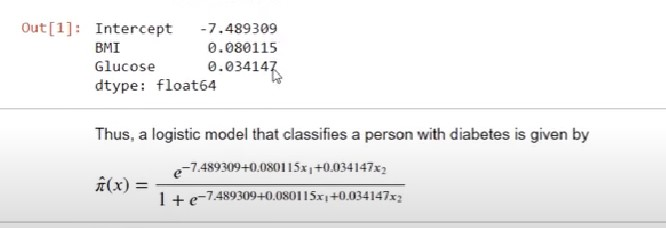

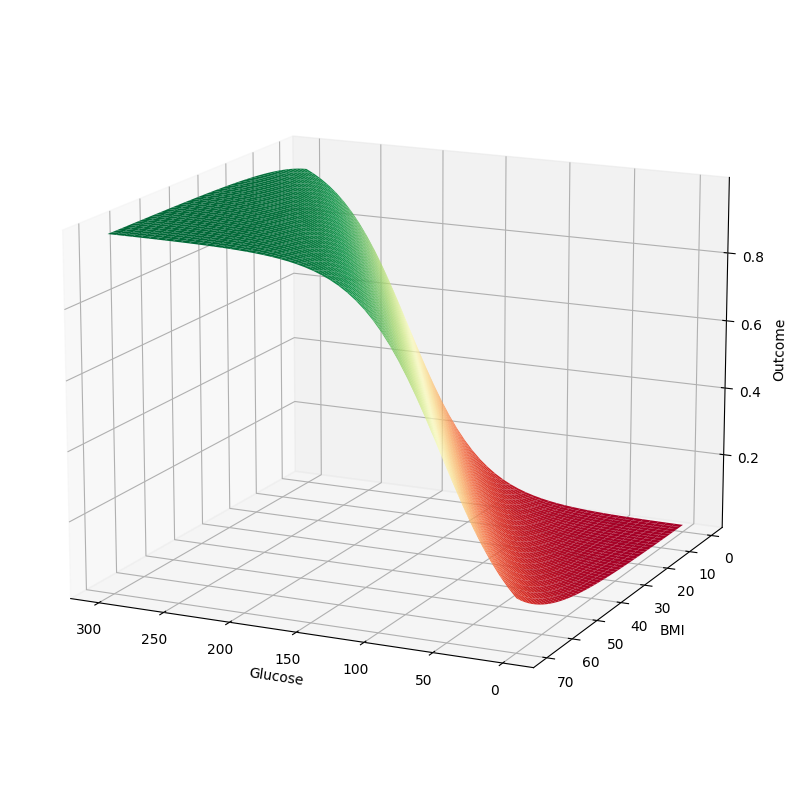

In [5]:
#ploting 3d surface
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return np.exp(-7.489309+0.080115*y+0.03447*x)/(1+np.exp(-7.489309+0.080115*y+0.03447*x))

df= diabetes
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(111, projection='3d')
x= np.linspace(0,300,50)
y= np.linspace(0,70,50)

X,y= np.meshgrid(x,y)
Z= f(X,y)
ax.plot_surface(X,y,Z, rstride=1, cstride=1, cmap='RdYlGn', edgecolor='none')

ax.view_init(15,115)
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Outcome')
plt.show()

In [6]:
#building logistic model

logisticRegr= LogisticRegression()
logisticRegr.fit(train[["BMI",'Glucose']], train["Outcome"])

#Run the model on the test set
predictions= logisticRegr.predict(test[["BMI",'Glucose']])


Text(0.5, 0, 'Outcome')

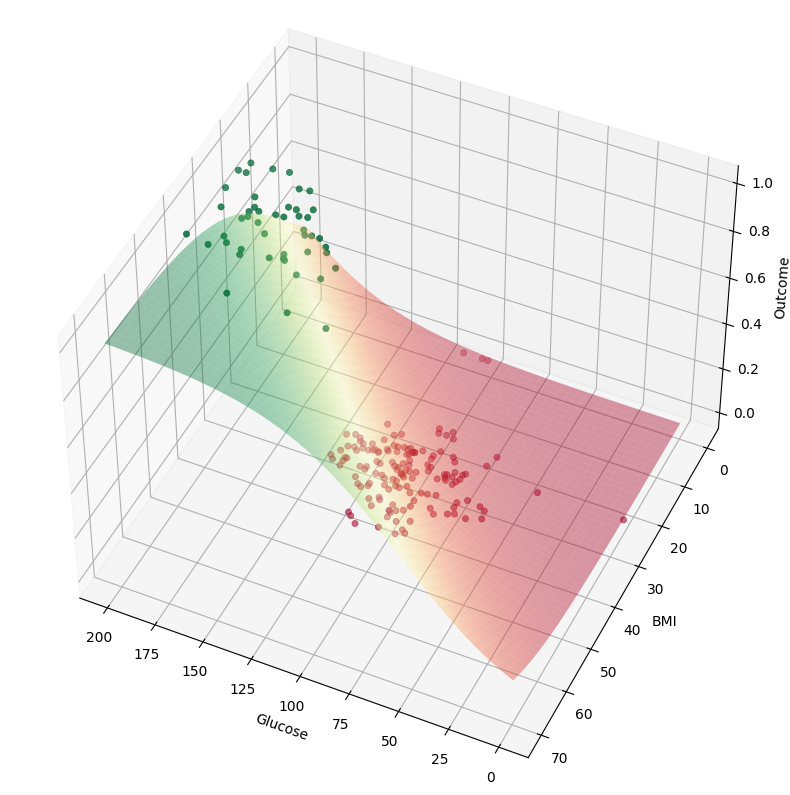

In [7]:
#ploting 3d surface
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return np.exp(logisticRegr.intercept_+logisticRegr.coef_[0][0]*y+logisticRegr.coef_[0][1]*x)/(1+np.exp(logisticRegr.intercept_+logisticRegr.coef_[0][0]*y+logisticRegr.coef_[0][1]*x))

fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(111, projection='3d')
x= test [['Glucose']].to_numpy()
y= test [['BMI']].to_numpy()
z= pd.DataFrame(predictions)
ax.scatter(x,y,z, c=z, cmap='RdYlGn', linewidth=0.5);


x= np.linspace(0,200,50)
y= np.linspace(0,70,50)

X,y= np.meshgrid(x,y)
Z= f(X,y)
ax.plot_surface(X,y,Z, rstride=1, cstride=1, cmap='RdYlGn', edgecolor='none', alpha=0.4)

ax.view_init(45,115)
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Outcome')


Yelllow is a cut off point between glucose and BMI
patients below thatn half if higer they are diabetic


##Evaluating Classification Models

In [ ]:
#overall Error Rate
#Misclassifed observations?all observatins

In [ ]:
#Accuracy is 1 - overall error rate
#how many instances model labled correctly


In [ ]:
#REcall/Sensitivity, Probablility of Detection/True positive Rate
#metric that provides ability to correctly identify positive results
#how good the test is at detecting the positves


In [ ]:
#specificity
#ability to correctly identify negative results


In [ ]:
#precision/psoitive predictive value
#provides confidence of predictev positives
#how many of the + classified of positives of all the positives


In [8]:
#import data with
diabetes = pd.read_csv(rf'diabetes.csv', sep=',')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#Build corelation matrix
diabetes.corr().sort_values(by='Outcome').style.background_gradient()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
#Creting logistic model that will help to plot regression plot

#train and split dataset
train, test = train_test_split(diabetes, test_size= 0.25, random_state= 0)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import make_pipeline

#Build the logistic model
logisticRegr_BMI= LogisticRegression(penalty='none')
logisticRegr_BMI.fit(train[["BMI"]], train["Outcome"])

#Run the model on the test set
#test data run
predictions_BMI= logisticRegr_BMI.predict(test[["BMI"]])
#generate confusion metrics
print('\nClassification Report BMI')
conf_BMI = metrics.confusion_matrix(test["Outcome"], predictions_BMI)
target_names= ['Non Diabetics', 'Diabetics']
print(metrics.classification_report(test["Outcome"], predictions_BMI, target_names= target_names))




Classification Report BMI
               precision    recall  f1-score   support

Non Diabetics       0.72      0.89      0.79       130
    Diabetics       0.53      0.26      0.35        62

     accuracy                           0.69       192
    macro avg       0.62      0.58      0.57       192
 weighted avg       0.66      0.69      0.65       192



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


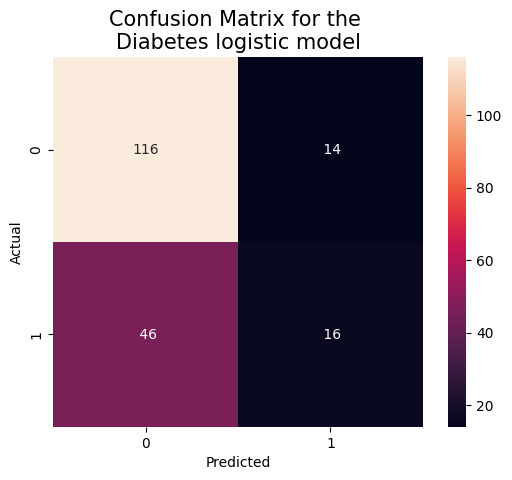

In [11]:
#generation of heatmap for confussion matrix on the basis of BMI value

sns.heatmap(conf_BMI, annot=True, fmt='3d', square= True);
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for the \nDiabetes logistic model', fontsize=15)
plt.show()

Extraction of theinformation
error rates
sensitivity
specificity
precission
class error rate
class 1 error rate
accuracy


BMI classification model readouts

In [12]:
tp =conf_BMI[1,1]
tn =conf_BMI[0,0]
fp =conf_BMI[0,1]
fn =conf_BMI[1,0]

#overall Error rate
misclassifiedObservations= (conf_BMI[1,0]+conf_BMI[0,1])
allobservations= (conf_BMI[1,1]+conf_BMI[0,0]+conf_BMI[1,0]+conf_BMI[0,1])

overallErrorRate= misclassifiedObservations/allobservations

accuracy= 1- overallErrorRate
print('Misclassified Observations', misclassifiedObservations)
print('All Observations', allobservations)
print()
print('Overall Error Rate', overallErrorRate)
print('Accuracy', accuracy)
print()

#calculate sensitivity

Class1ErrRate= (conf_BMI[1,0]/(conf_BMI[1,0]+conf_BMI[1,1]))
print('Class 1 Error Rate', Class1ErrRate)
sensitivity= tp/(tp+fn)
print('Sensitivity/Recall is', sensitivity)
print()

#calculate specificity
Class0ErrRate= (conf_BMI[0,1]/(conf_BMI[0,0]+conf_BMI[0,1]))
print('Class 0 Error Rate', Class0ErrRate)
specificity= tn/(tn+fp)
print('Specificity is', specificity)
print()

#precision
precision= tp/(tp+fp)
print('Precision is', precision)
print()

Misclassified Observations 60
All Observations 192

Overall Error Rate 0.3125
Accuracy 0.6875

Class 1 Error Rate 0.7419354838709677
Sensitivity/Recall is 0.25806451612903225

Class 0 Error Rate 0.1076923076923077
Specificity is 0.8923076923076924

Precision is 0.5333333333333333



Glucose predictor model

In [13]:
#Build the logistic model for GLucose
logisticRegr_BMI= LogisticRegression(penalty='none')
logisticRegr_BMI.fit(train[["Glucose"]], train["Outcome"])

#Run the model on the test set
#test data run
predictions_glucose= logisticRegr_BMI.predict(test[["Glucose"]])
#generate confusion metrics
#print('\nClassification Report Glucose')
#conf_BMI = metrics.confusion_matrix(test["Outcome"], predictions_BMI)
#target_names= ['Non Diabetics', 'Diabetics']
print(metrics.classification_report(test["Outcome"], predictions_glucose, digits=4, target_names= target_names))



               precision    recall  f1-score   support

Non Diabetics     0.7891    0.8923    0.8375       130
    Diabetics     0.6889    0.5000    0.5794        62

     accuracy                         0.7656       192
    macro avg     0.7390    0.6962    0.7085       192
 weighted avg     0.7568    0.7656    0.7542       192



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [14]:
#building prediciton model based on both prediction models

logisticRegr_glucose_BMI= LogisticRegression(penalty='none')
logisticRegr_glucose_BMI.fit(train[["BMI","Glucose"]], train["Outcome"])

#Run the model on the test set
predictions_glucose_BMI= logisticRegr_glucose_BMI.predict(test[["BMI","Glucose"]])

print(metrics.classification_report(test["Outcome"], predictions_glucose_BMI, digits=4, target_names= target_names))


               precision    recall  f1-score   support

Non Diabetics     0.8000    0.8923    0.8436       130
    Diabetics     0.7021    0.5323    0.6055        62

     accuracy                         0.7760       192
    macro avg     0.7511    0.7123    0.7246       192
 weighted avg     0.7684    0.7760    0.7667       192



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


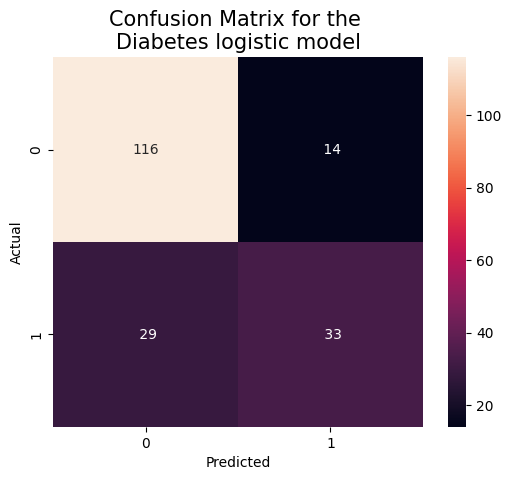

In [15]:
#building 2X2 confussion matrix
conf_glucose_BMI = metrics.confusion_matrix(test["Outcome"], predictions_glucose_BMI)
sns.heatmap(conf_glucose_BMI, annot=True, fmt='3d', square= True);
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for the \nDiabetes logistic model', fontsize=15)
plt.show()

In [16]:
# Extract values from the confusion matrix
tp = conf_glucose_BMI[1, 1]
tn = conf_glucose_BMI[0, 0]
fp = conf_glucose_BMI[0, 1]
fn = conf_glucose_BMI[1, 0]

# Overall Error Rate
misclassifiedObservations = (conf_glucose_BMI[1, 0] + conf_glucose_BMI[0, 1])
allobservations = (conf_glucose_BMI[1, 1] + conf_glucose_BMI[0, 0] + conf_glucose_BMI[1, 0] + conf_glucose_BMI[0, 1])

overallErrorRate = misclassifiedObservations / allobservations
accuracy = 1 - overallErrorRate

print('Misclassified Observations:', misclassifiedObservations)
print('All Observations:', allobservations)
print()
print('Overall Error Rate:', overallErrorRate)
print('Accuracy:', accuracy)
print()

# Calculate sensitivity
Class1ErrRate = (conf_glucose_BMI[1, 0] / (conf_glucose_BMI[1, 0] + conf_glucose_BMI[1, 1]))
print('Class 1 Error Rate:', Class1ErrRate)
sensitivity = tp / (tp + fn)
print('Sensitivity/Recall is:', sensitivity)
print()

# Calculate specificity
Class0ErrRate = (conf_glucose_BMI[0, 1] / (conf_glucose_BMI[0, 0] + conf_glucose_BMI[0, 1]))
print('Class 0 Error Rate:', Class0ErrRate)
specificity = tn / (tn + fp)
print('Specificity is:', specificity)
print()

# Calculate precision
precision = tp / (tp + fp)
print('Precision is:', precision)
print()


Misclassified Observations: 43
All Observations: 192

Overall Error Rate: 0.22395833333333334
Accuracy: 0.7760416666666666

Class 1 Error Rate: 0.46774193548387094
Sensitivity/Recall is: 0.532258064516129

Class 0 Error Rate: 0.1076923076923077
Specificity is: 0.8923076923076924

Precision is: 0.7021276595744681



#ROC curves
graphical plot that represents diagnostic ability of a binary classifiery system

places TPR agains the FPR at various trehsold settings

In [18]:
!pip install plot-metric


(array([0.        , 0.        , 0.        , 0.01538462, 0.01538462,
        0.03076923, 0.03076923, 0.03846154, 0.03846154, 0.04615385,
        0.04615385, 0.05384615, 0.05384615, 0.06153846, 0.06153846,
        0.08461538, 0.08461538, 0.09230769, 0.09230769, 0.10769231,
        0.10769231, 0.13846154, 0.13846154, 0.14615385, 0.14615385,
        0.20769231, 0.20769231, 0.21538462, 0.21538462, 0.22307692,
        0.22307692, 0.23076923, 0.23076923, 0.23846154, 0.23846154,
        0.28461538, 0.28461538, 0.29230769, 0.29230769, 0.3       ,
        0.3       , 0.31538462, 0.31538462, 0.33076923, 0.33076923,
        0.33846154, 0.33846154, 0.36153846, 0.36153846, 0.4       ,
        0.4       , 0.42307692, 0.42307692, 0.46153846, 0.46153846,
        0.47692308, 0.47692308, 0.52307692, 0.52307692, 0.54615385,
        0.54615385, 0.96923077, 0.96923077, 1.        ]),
 array([0.        , 0.01612903, 0.03225806, 0.03225806, 0.12903226,
        0.12903226, 0.24193548, 0.24193548, 0.25806452, 0.

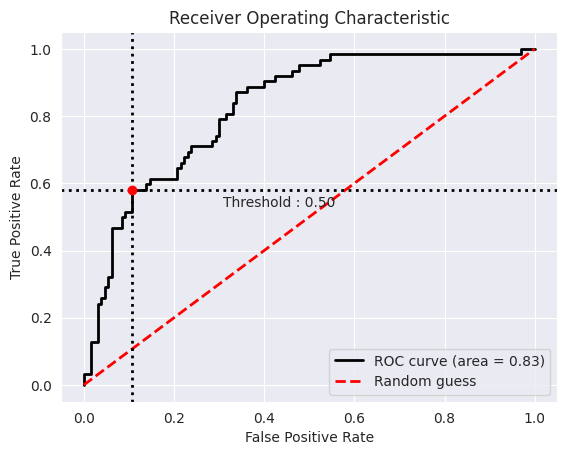

In [19]:
from plot_metric.functions import BinaryClassification
y_pred = logisticRegr_glucose_BMI.predict_proba(test[["BMI","Glucose"]])[:,1]
bc= BinaryClassification(test["Outcome"], y_pred, labels=["Diabetics", "Non Diabetics"])
bc.plot_roc_curve()

To summarize the prefomance of the model for comparision purposes

kNN classifier

(array([0.        , 0.00769231, 0.03076923, 0.05384615, 0.06153846,
        0.08461538, 0.15384615, 0.26923077, 0.43076923, 0.65384615,
        0.81538462, 1.        ]),
 array([0.        , 0.0483871 , 0.17741935, 0.27419355, 0.35483871,
        0.46774194, 0.58064516, 0.69354839, 0.80645161, 0.90322581,
        0.96774194, 1.        ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]),
 0.774317617866005)

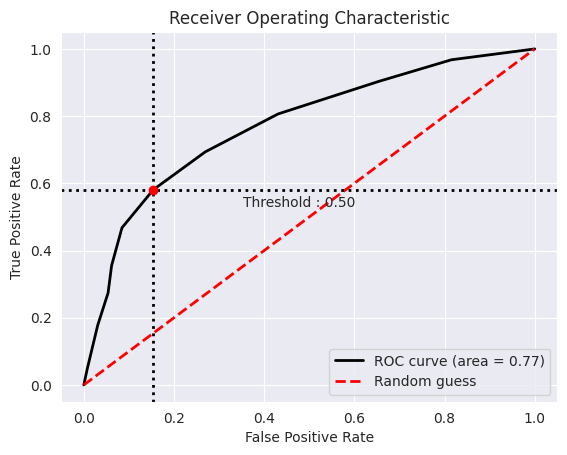

In [20]:
n_neighbors=10
knnclassifier= KNeighborsClassifier(n_neighbors=n_neighbors)

knnclassifier.fit(train[["BMI","Glucose"]], train["Outcome"])

y_pred_knn = knnclassifier.predict_proba(test[["BMI","Glucose"]])[:,1]
#visualisation

bc_knn= BinaryClassification(test["Outcome"], y_pred_knn, labels=["Diabetics", "Non Diabetics"])
bc_knn.plot_roc_curve()

AUC is classification threshold invariant; it measures the quality of the model's predictions irrespective of the classification threshold chosen

Genereting plot of both metrics

(array([0.        , 0.00769231, 0.03076923, 0.05384615, 0.06153846,
        0.08461538, 0.15384615, 0.26923077, 0.43076923, 0.65384615,
        0.81538462, 1.        ]),
 array([0.        , 0.0483871 , 0.17741935, 0.27419355, 0.35483871,
        0.46774194, 0.58064516, 0.69354839, 0.80645161, 0.90322581,
        0.96774194, 1.        ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]),
 0.774317617866005)

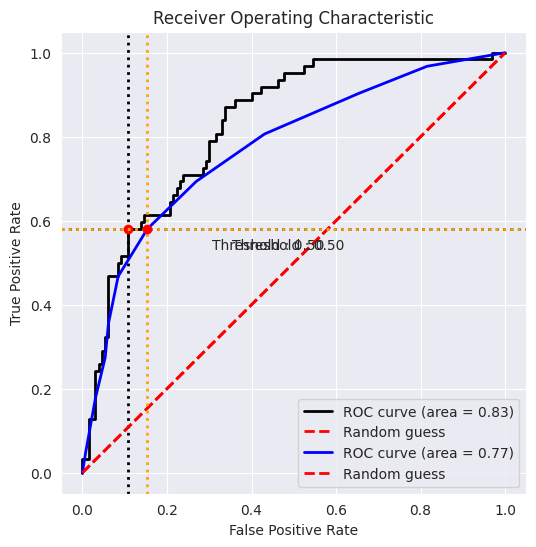

In [24]:
param_pr_plot = {
    "c_roc_curve":'blue',
    'c_thresh_lines':'orange',
}
plt.figure(figsize=(6,6))
bc.plot_roc_curve();
bc_knn.plot_roc_curve(**param_pr_plot)

The closer the curve comes to the 45-degree diagonal of the ROC space, the less effective the test.

AUC is desirable because it is an aggregate measure of performance across all possible classification thresholds. AUC is scale invariant; it measures how well predictions are ranked

AUC measures the quality of the model's predictions irrespective of the classification threshold chosen.

In [ ]:
#looking at the Glucose and BMI becouse they have highest positive correlation with the outcome
#building two class classification using kNN
#show their associate decision boundries


<ipython-input-8-83934ed4637b>:40: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x= x[:,0], y= x[:,1], hue= y, palette= cmap_bold, alpha= 1.0, edgecolor= 'black')
<ipython-input-8-83934ed4637b>:40: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x= x[:,0], y= x[:,1], hue= y, palette= cmap_bold, alpha= 1.0, edgecolor= 'black')


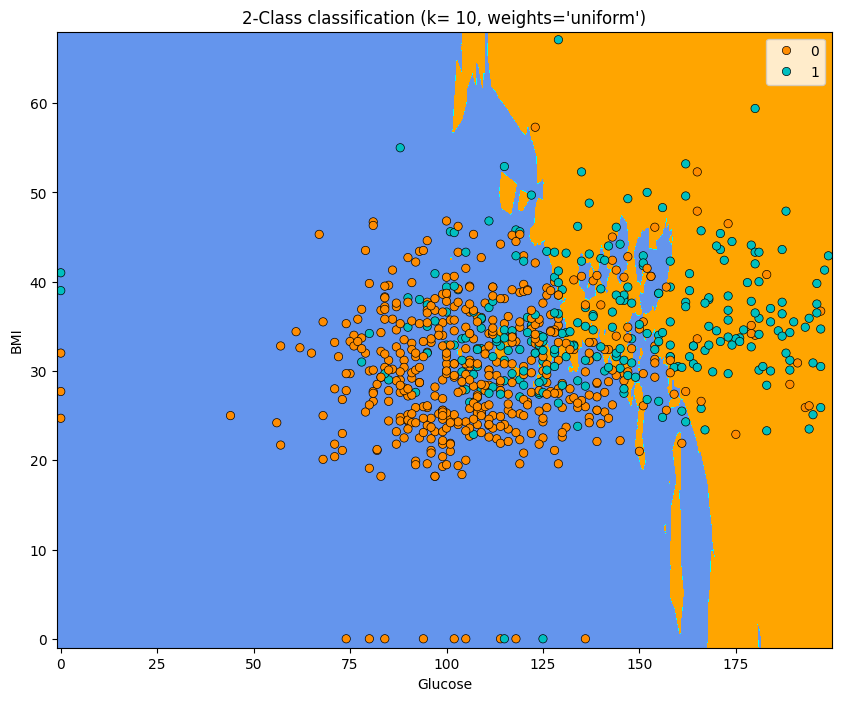

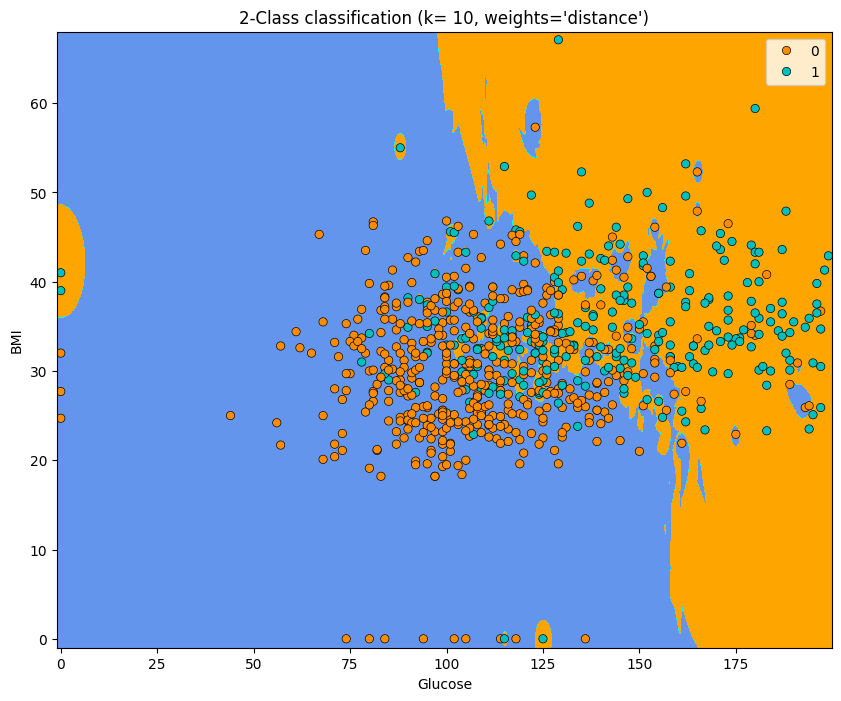

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors
xfeed = 'Glucose'
yfeed = 'BMI'
n_neighbors = 10

# Subsetting data
x = diabetes[[xfeed, yfeed]].to_numpy()

# Data containing the labels
y = diabetes.Outcome.to_numpy()

#step size in mesh
h = 0.1
cmap_light = ListedColormap(['cornflowerblue', 'cyan', 'orange'])
cmap_bold = ['darkorange', 'c', 'darkblue']


for weights in ['uniform', 'distance']:
    # Create an instance of Neighbors Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

    #plot the decision boundry
    x_min, x_max= x[:,0].min()- 1, x[:,0].max()+ 1
    y_min, y_max= x[:,1].min()- 1, x[:,1].max()+ 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])

    #put into the color
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap= cmap_light)

    #plot the training points
    sns.scatterplot(x= x[:,0], y= x[:,1], hue= y, palette= cmap_bold, alpha= 1.0, edgecolor= 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k= %i, weights='%s')" % (n_neighbors, weights))
    plt.xlabel(xfeed)
    plt.ylabel(yfeed)

plt.show()



these features predicted well if the person has a diabetes


In [ ]:
#split diabetes data set into 2/3 and 1/3
#measuring the classifier exactnes and comletnes


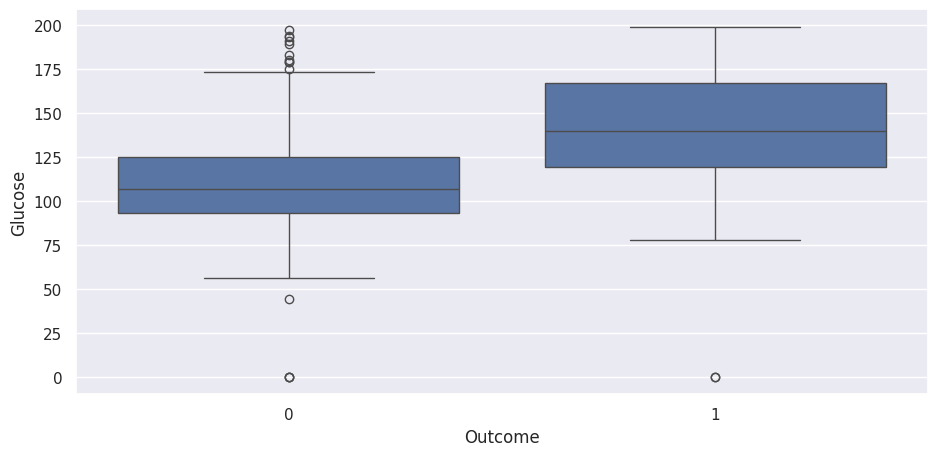

In [ ]:
sns.set_theme(color_codes=True)
fig,ax=plt.subplots()
fig.set_size_inches(11,5)
sns.boxplot(y=xfeed, x=diabetes.Outcome,data=diabetes, ax=ax );
plt.show()

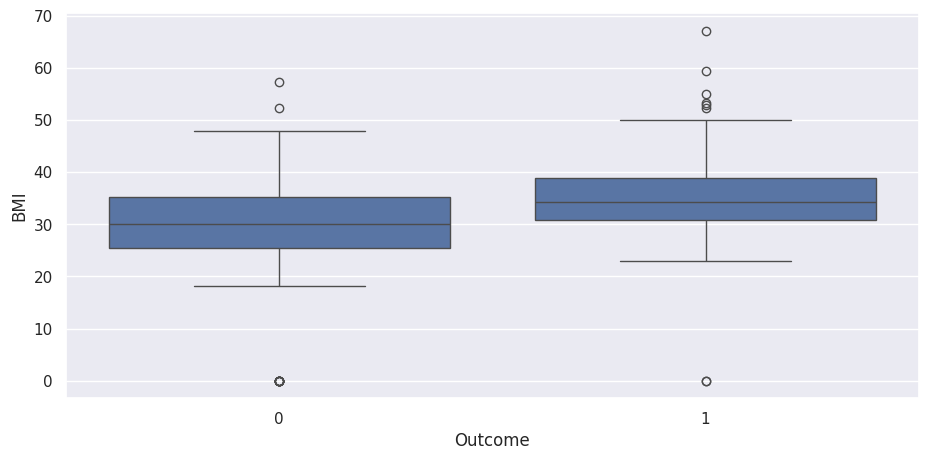

In [ ]:
sns.set_theme(color_codes=True)
fig,ax=plt.subplots()
fig.set_size_inches(11,5)
sns.boxplot(y=yfeed, x=diabetes.Outcome,data=diabetes, ax=ax );
plt.show()

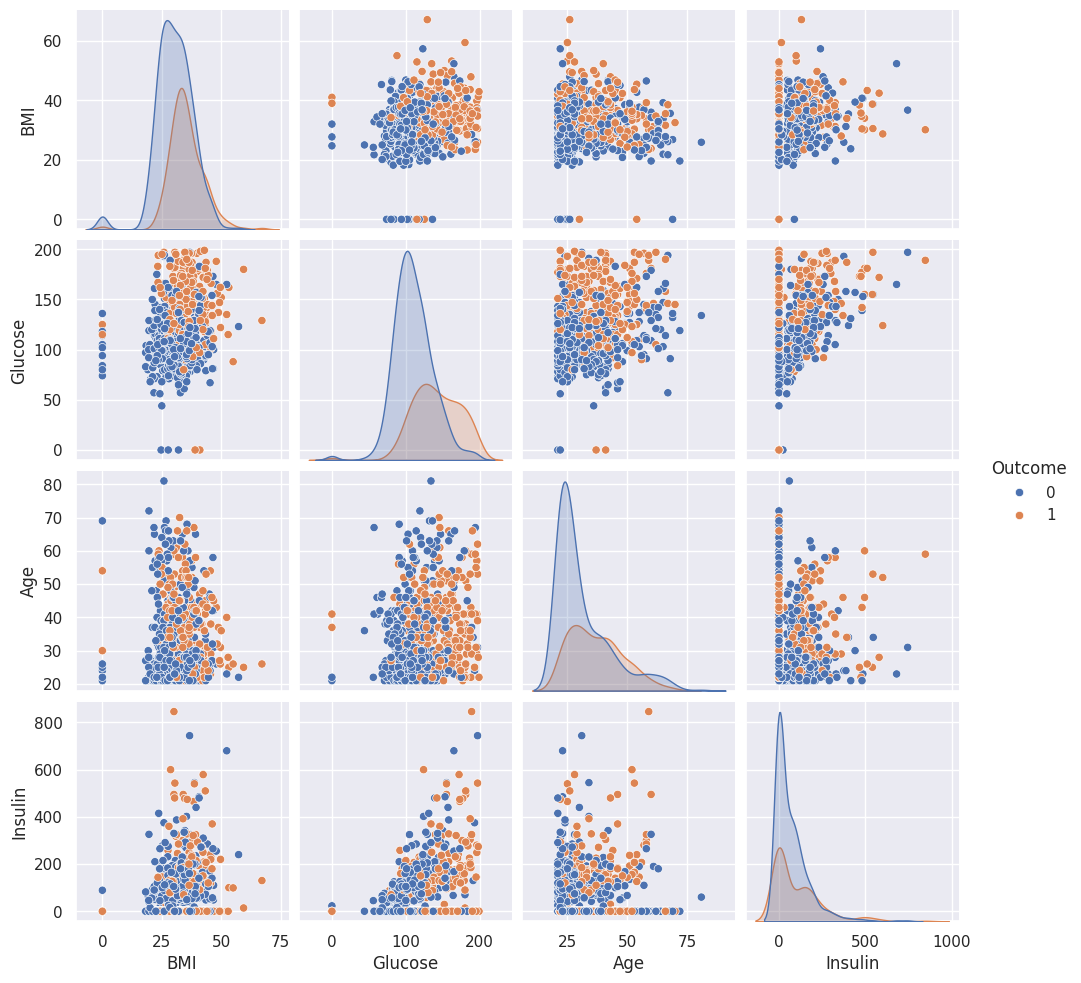

In [ ]:
sns.pairplot(diabetes, vars= ['BMI','Glucose','Age','Insulin'] , hue= 'Outcome');
plt.show()

In [ ]:
#training and test sets


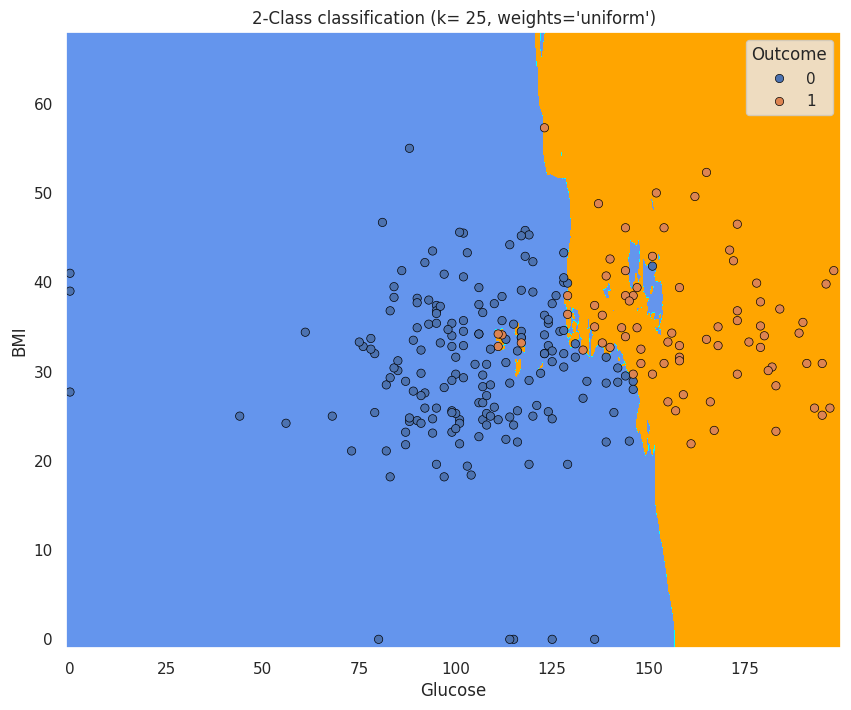

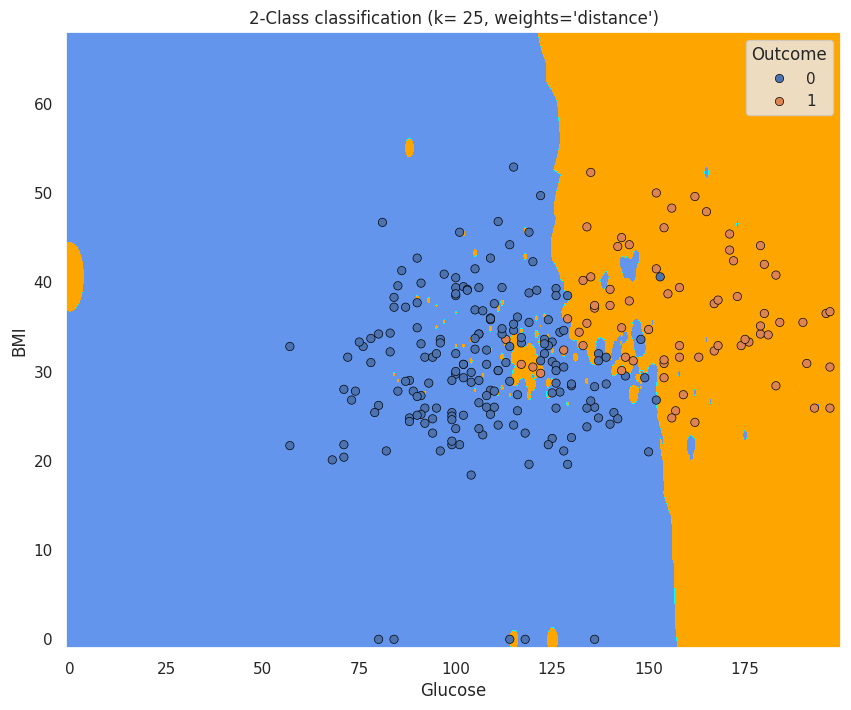

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors
xfeed = 'Glucose'
yfeed = 'BMI'
n_neighbors = 25

# Subsetting data
x = diabetes[[xfeed, yfeed]].to_numpy()

# Data containing the labels
y = diabetes.Outcome.to_numpy()

#step size in mesh
h = 0.1
cmap_light = ListedColormap(['cornflowerblue', 'cyan', 'orange'])
cmap_bold = ['darkorange', 'c', 'darkblue']


for weights in ['uniform', 'distance']:
#split the dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33)

    # Create an instance of Neighbors Classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x_train, y_train)

    #plot the decision boundry
    x_min, x_max= x[:,0].min()- 1, x[:,0].max()+ 1
    y_min, y_max= x[:,1].min()- 1, x[:,1].max()+ 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])

    #put into the color
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap= cmap_light)
#running the clasyfier
    y_pred =clf.predict(x_test)
    dftesting= pd.DataFrame(x_test, columns= ['X','Y'])
    dftesting['Outcome']= pd.DataFrame(y_pred)


    #plot the training points
    sns.scatterplot(x= dftesting.X, y= dftesting.Y, hue= dftesting.Outcome, alpha= 1.0, edgecolor= 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k= %i, weights='%s')"
              % (n_neighbors, weights))
    plt.xlabel(xfeed)
    plt.ylabel(yfeed)
plt.show()